In [82]:
# Mkhanyisi Gamedze
# email: mkhanyisi.g@gmail.com
# mobile: 2076169348 / 7865491972
# Klaviyo BI Data Engineer Challenge
# 21 December 2019

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_context('notebook')
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.0

%matplotlib inline

## Load data

In [83]:
curr_dir = os.getcwd()
dt_path = os.path.join(curr_dir, 'exercise-data.csv/')

In [84]:
#dt = pd.read_csv(os.path.join(dt_path), 'exercise-data.csv')
dt = pd.read_csv('exercise-data.csv')

# Question 1

Trying to identify possible data errors through quality assurance techniques or data cleaning 

In [85]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
Unnamed: 0    1048575 non-null int64
delivered     1048575 non-null int64
opened        1048575 non-null int64
clicked       1048575 non-null int64
orders        1048575 non-null int64
aov           1048575 non-null float64
type          1048575 non-null int64
dtypes: float64(1), int64(6)
memory usage: 56.0 MB


In [86]:
print ("Shape of Dataframe")
dt.shape

Shape of Dataframe


(1048575, 7)

In [87]:
dt.head()

,Unnamed: 0,delivered,opened,clicked,orders,aov,type
0,1,70,28,0,0,87.12,0
1,2,593202,103976,2071,117,98.01,1
2,3,24693,2532,43,5,58.73,2
3,4,3377,971,22,2,56.03,0
4,5,329913,101421,1680,166,58.83,2


replace "Unamed: 0" column title with "campaign", as that column represents each campaign number/ID used and it's corresponding row metrics

In [88]:
dt.rename(columns={"Unnamed: 0":"campaign"},inplace=True)
dt.head()

,campaign,delivered,opened,clicked,orders,aov,type
0,1,70,28,0,0,87.12,0
1,2,593202,103976,2071,117,98.01,1
2,3,24693,2532,43,5,58.73,2
3,4,3377,971,22,2,56.03,0
4,5,329913,101421,1680,166,58.83,2


In [89]:
# data quality control for analysis

""" Account for these in further analysis """
# missing data, wrong entries (negative(-ve) prices/aov), extreme outliers, duplicates, mixed data types, 
# 1. negative average order value
# 2. outliers: unrepresentative of the typical clients
# 3. 

# check for null values in millions of lines
dt.isnull().sum()

campaign     0
delivered    0
opened       0
clicked      0
orders       0
aov          0
type         0
dtype: int64

In [90]:
# Quality check: We should only have three catergories
"""
type - degree of targeting
○ 0 = emails were sent to a highly targeted audience
○ 1 = neutral targeting
○ 2 = generic email was sent to a wide audience
"""
print ("output should be 3. \nOutput:")
dt['type'].nunique()

output should be 3. 
Output:


3

Eyeball other possible anomalies within data to do more quality check/Cleaning from descriptive statistics

In [91]:
# check for duplicate rows
dt.duplicated().sum()

0

In [92]:
dt.describe()

,campaign,delivered,opened,clicked,orders,aov,type
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242880e+05,7.576635e+04,9.651388e+03,2.302434e+02,2.051529e+01,6.722376e+01,9.986114e-01
std,3.026977e+05,3.262941e+05,3.170030e+04,9.621397e+02,9.590078e+01,2.500907e+01,8.122977e-01
min,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.906000e+01,0.000000e+00
25%,2.621445e+05,4.832000e+03,7.890000e+02,1.000000e+01,1.000000e+00,5.034000e+01,0.000000e+00
50%,5.242880e+05,1.997100e+04,2.928000e+03,4.700000e+01,4.000000e+00,6.721000e+01,1.000000e+00
75%,7.864315e+05,6.542400e+04,8.874000e+03,1.770000e+02,1.400000e+01,8.408000e+01,2.000000e+00
max,1.048575e+06,1.559867e+07,1.397644e+06,1.286160e+05,1.229200e+04,1.849900e+02,2.000000e+00


Most of the daa looks reasonable with mostly real and positive numbers. Howver, AOV- Average Order Value column above has some a minimum order values below 0 or negetive(-ve) implying multiple others below 0. Ignore these for analysis (Assuming these are not what company wants or are returned items)

In [93]:
dt[dt['aov'] < 0].count()
# the assumption: negative values are data errors. delete them for now

campaign     3745
delivered    3745
opened       3745
clicked      3745
orders       3745
aov          3745
type         3745
dtype: int64

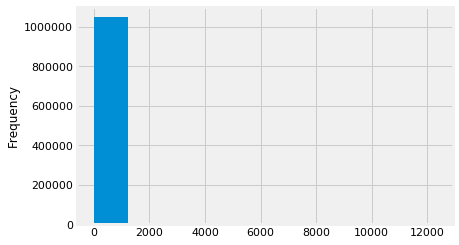

In [94]:
dt['orders'].plot(kind = 'hist')
# extreme outliers:

In [95]:
dt[dt['orders'] > 2000].count()/dt.shape[0] # get rid of these

campaign     0.000331
delivered    0.000331
opened       0.000331
clicked      0.000331
orders       0.000331
aov          0.000331
type         0.000331
dtype: float64

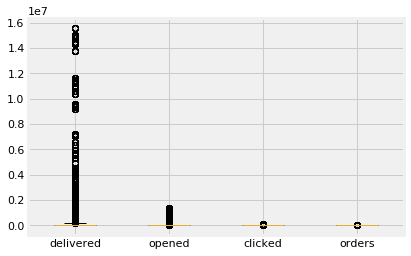

In [96]:
dt[dt.columns[1:5]].plot(kind='box');

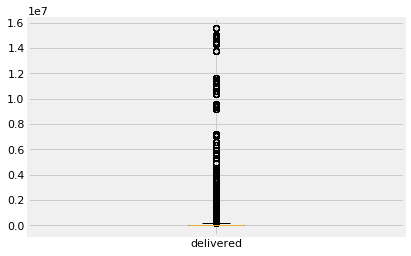

In [97]:
dt['delivered'].plot('box');

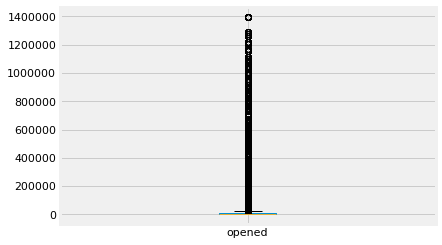

In [98]:
dt['opened'].plot('box');

In [99]:
# further processing, copy dataframe
df = dt.copy()

In [100]:
mask = df['orders'] < 500
df = df[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045075 entries, 0 to 1048574
Data columns (total 7 columns):
campaign     1045075 non-null int64
delivered    1045075 non-null int64
opened       1045075 non-null int64
clicked      1045075 non-null int64
orders       1045075 non-null int64
aov          1045075 non-null float64
type         1045075 non-null int64
dtypes: float64(1), int64(6)
memory usage: 63.8 MB


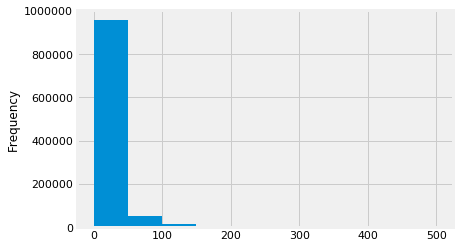

In [101]:
df['orders'].plot(kind = 'hist');

# keep 99%

In [102]:
# get descriptive stats by type of email campaign sent
df.groupby(['type']).describe()

aov                                                            \
         count       mean        std    min    25%    50%    75%     max   
type                                                                       
0     346592.0  67.274741  25.048203 -48.29  50.40  67.27  84.13  180.26   
1     354646.0  67.196238  24.992704 -44.16  50.33  67.22  84.04  184.99   
2     343837.0  67.201255  24.984122 -49.06  50.29  67.14  84.08  180.99   

      campaign                 ...     opened               orders             \
         count           mean  ...        75%        max     count       mean   
type                           ...                                              
0     346592.0  523679.581104  ...     1857.0   271228.0  346592.0   4.645537   
1     354646.0  524835.212237  ...    12168.0  1397644.0  354646.0  22.321791   
2     343837.0  524274.839825  ...    12873.0  1291839.0  343837.0  23.691787   

                                             
            std  min  25%  50%   75%    max  
type                                         
0     15.879503  0.0  0.0  1.0   3.0  494.0  
1     47.585821  0.0  2.0  6.0  21.0  499.0  
2     47.271395  0.0  2.0  7.0  23.0  499.0  

[3 rows x 48 columns]

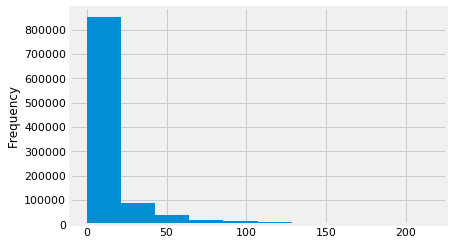

In [103]:
# get rid of extreeme value orders for large bulk as this may skew/bias analysis. We want to understand average customer 
df = df[df['orders'] < df["orders"].quantile(0.99)]
df.orders.plot(kind = 'hist');

# all extreme variables, we'll use 99% of the observations

In [104]:
df = dt.copy()
df['type'] = df['type'].astype(str, ) # make ad campaign type be a string/categorical variable, so it's not in descriptive stats

# get rid of anomaly values from bulk purchase customers
df = df[df['orders'] < df["orders"].quantile(0.99)]
df = df[df['delivered'] < df["delivered"].quantile(0.99)]
df = df[df['opened'] < df["opened"].quantile(0.99)]
df = df[df['clicked'] < df["clicked"].quantile(0.99)]

# drop -ve aov, take only +ve aov
positive_orders = df['aov'] > 0
df = df[positive_orders]



In [105]:
# duplicates
df.duplicated().sum() # should be zero

0

In [106]:
df.drop('campaign', inplace = True, axis = 1) # useless column, drop it for analysis. Only serves as ID

In [107]:
df.describe()

,delivered,opened,clicked,orders,aov
count,1.003644e+06,1.003644e+06,1.003644e+06,1.003644e+06,1.003644e+06
mean,4.567140e+04,6.085085e+03,1.324676e+02,1.179427e+01,6.748844e+01
std,7.135719e+04,8.552628e+03,2.166900e+02,2.213618e+01,2.464445e+01
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02
25%,4.559000e+03,7.380000e+02,1.000000e+01,1.000000e+00,5.055000e+01
50%,1.805400e+04,2.682000e+03,4.300000e+01,3.000000e+00,6.731000e+01
75%,5.643600e+04,7.806000e+03,1.510000e+02,1.200000e+01,8.415000e+01
max,6.423180e+05,5.636800e+04,1.405000e+03,2.590000e+02,1.849900e+02


In [108]:
df.head()

,delivered,opened,clicked,orders,aov,type
0,70,28,0,0,87.12,0
2,24693,2532,43,5,58.73,2
3,3377,971,22,2,56.03,0
5,10722,1116,15,2,47.35,2
6,8727,3315,50,6,92.15,0


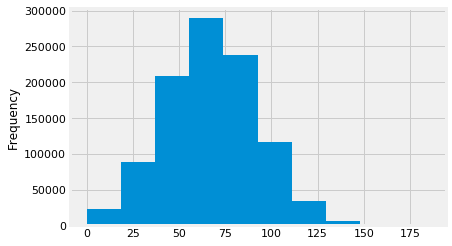

In [109]:
df.aov.plot(kind = 'hist');

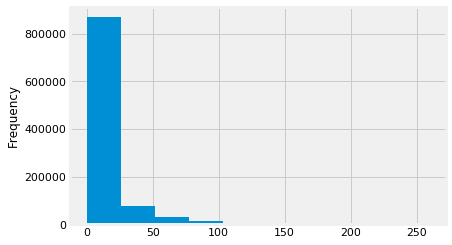

In [110]:
df.orders.plot(kind = 'hist');

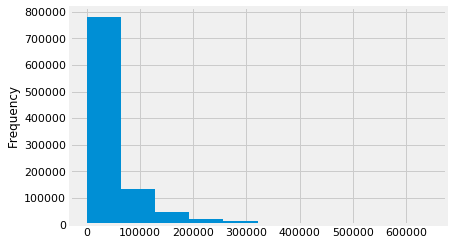

In [111]:
df.delivered.plot(kind = 'hist');

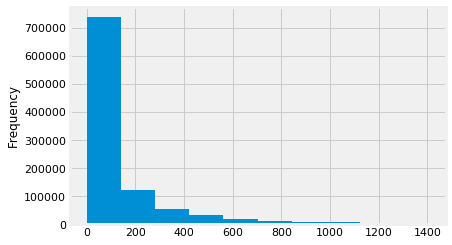

In [112]:
df.clicked.plot(kind = 'hist');

This is an example of my approach to analysis given the business problem and how I would ensure quality of the data before any analysis is made. More information like what negative order values mean and general guidelines for targeting as I controlled for outliers. 

### Question 2

Group these variables then calculated metrics 

In [113]:
# todo : clean up 
summaries = df.groupby(['type']).describe()
print (summaries)

           aov                                                           \
         count       mean        std   min    25%    50%    75%     max   
type                                                                      
0     343929.0  67.545065  24.683887  0.02  50.62  67.38  84.20  180.26   
1     335864.0  67.465071  24.640320  0.01  50.54  67.33  84.13  184.99   
2     323851.0  67.452528  24.606756  0.03  50.49  67.23  84.12  180.99   

       clicked              ...     opened             orders             \
         count        mean  ...        75%      max     count       mean   
type                        ...                                            
0     343929.0   46.360586  ...     1830.0  55756.0  343929.0   4.094752   
1     335864.0  170.361608  ...    10456.0  56368.0  335864.0  15.196056   
2     323851.0  184.613294  ...    11031.0  56340.0  323851.0  16.443176   

                                             
            std  min  25%  50%   75%    max  


In [114]:
# new varibales (metrics)
df['open_rate'] = df['opened']/df['delivered']
df['click_rate'] = df['clicked'] / df['opened']
df['aov'].describe() # descriptive stats

count    1.003644e+06
mean     6.748844e+01
std      2.464445e+01
min      1.000000e-02
25%      5.055000e+01
50%      6.731000e+01
75%      8.415000e+01
max      1.849900e+02
Name: aov, dtype: float64

In [115]:
df.head()

,delivered,opened,clicked,orders,aov,type,open_rate,click_rate
0,70,28,0,0,87.12,0,0.400000,0.000000
2,24693,2532,43,5,58.73,2,0.102539,0.016983
3,3377,971,22,2,56.03,0,0.287533,0.022657
5,10722,1116,15,2,47.35,2,0.104085,0.013441
6,8727,3315,50,6,92.15,0,0.379856,0.015083


In [116]:
# Descriptive stats by catergory
df.groupby(['type'])['open_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,343929.0,0.234752,0.159338,0.000000,0.128156,0.196643,0.297086,1.000000
1,335864.0,0.181290,0.097723,0.001827,0.112153,0.167041,0.232733,0.829268
2,323851.0,0.147985,0.082383,0.003679,0.087865,0.130868,0.191263,0.731908


In [117]:
# Descriptive stats by catergory
df.groupby(['type'])['click_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,343770.0,0.023297,0.018849,0.0,0.008380,0.019685,0.034442,0.166667
1,335864.0,0.023465,0.017689,0.0,0.009440,0.019928,0.033752,0.138030
2,323851.0,0.023342,0.017680,0.0,0.009288,0.019716,0.033648,0.133333


In [118]:
# median values for all three Ad targeting marketing strategies
df.groupby('type')['aov'].median()

type
0    67.38
1    67.33
2    67.23
Name: aov, dtype: float64

## Question 3

In [119]:
# converstion rate: from emails sent, how many people actually order products. (Business value in this marketing strategy)
df['conversion_rate'] = df['orders'] / df['delivered']
df.groupby('type')['conversion_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
0,343929.0,0.000381,0.000662,0.0,0.000000,0.000131,0.000505,0.020000
1,335864.0,0.000372,0.000472,0.0,0.000067,0.000218,0.000501,0.009513
2,323851.0,0.000305,0.000387,0.0,0.000062,0.000179,0.000401,0.009722


In [120]:
df.groupby('type')['conversion_rate'].mean()

# grouped t-test

type
0    0.000381
1    0.000372
2    0.000305
Name: conversion_rate, dtype: float64

For targeting type "0 = emails sent to a highly targeted audience", for these, there is an ~8% higher conversion rate than generic fishing emails sent to larger audiences. Even for the semi-targeted emails in category "1", these statistics support a still significant ~7% increase in converstion rate from category "2". These mean statistical data support this hypothesis emperically.

## Question 4

If limited computing resources:

1. Random Sampling: a simple random sample gives an unbiased representation of the dataset if large enough to meet these requirements
2. Stratified sampling: take a sufficiently large random sample, n, from each of the three types. Total sample fit within computing constraints
2. Batch analysis: process the data in batches into algroithms that save values and processes/computes data sequentially or at the same time

If not:
3. Parrallel and Distributed analysis (e.g Apache Spark, Hadoop)
4. Cloud computing kernels if those computing resources available (AWS, Google Cloud, Azure)

# Question 5:

There are so many metrics within this email campaign strategy and things the manager could focus on. The goal however is to increase Sales from email campaigns as a channel, and so he would have to optimize for metrics directly affecting that. Understanding the most effective stategy from the three mentioned, yielding the best conversion rate, as seen from analysis would be the one wise to invest more resources on. 

Hierarchy:
1. Conversion rate (directly affects sales)
2. Click Rate/User engagement ( capturing user interest onto ad campaign)
3. Open rate (Retaining the users attention and not being put in spam)
4. Understanding the types of goods within AOV and targeted ads (More personalized targeting and profiling users)

## Question 6

Recommendations:

Targeted advertising emails are an effective strategy and generate significantly more user retention/conversion rates. This directly impacts sales growth. The click rate has approximately the same mean across all different strategies, at ~2.3% with not much a significant difference. This indicates a greater difficulty in capturing user attention in strategy than in retention once users have clicked on email. The emperical evidence from the analytics support the effectiveness of different impacts and strengths of marketing strategies.     

# Question 7:
### help with more precise targeting of customers
- user demographic data from profiles: incomes, occupation
- purchase history for each unique user
- how many users unsubscribe from emails and reasons why, to improve personalization and targeting
- customer acquisition cost, extra charges on purchase and impact on buying

All this extra information from users would help in understanding better the customer and how the email advertising can be targeted to optimize the likelihood of user purchasing product.  